In [1]:
# 1. Configuração do ambiente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Evitar quebra de linha no print do DataFrame
pd.set_option('display.width', 0)  # ou use um valor grande como 2000
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # Impede quebra em várias linhas

# 2. Leitura do CSV (ajuste o caminho se necessário)
df = pd.read_csv("BRA.csv")

# Country: País onde ocorreu a partida (ex: Brazil)
# League: Nome da liga (ex: Serie A)
# Season: Ano da temporada (ex: 2012)
# Date: Data do jogo (formato dia/mês/ano)
# Time: Horário da partida (horário local, pode estar ausente em alguns jogos)
# Home: Nome do time mandante
# Away: Nome do time visitante
# HG: Gols marcados pelo time da casa (Home Goals)
# AG: Gols marcados pelo time visitante (Away Goals)
# Res: Resultado da partida (H = vitória do mandante, D = empate, A = vitória do visitante)

# PSCH, PSCD, PSCA: Odds de fechamento (closing odds) do mercado de apostas da Pinnacle para vitória do mandante (H), empate (D) e vitória do visitante (A)
# MaxCH, MaxCD, MaxCA: Maiores odds disponíveis entre as casas de apostas para H, D e A
# AvgCH, AvgCD, AvgCA: Odds médias do mercado para H, D e A

# BFECH, BFECD, BFECA: Odds do site Betfair Exchange para H, D e A (podem estar ausentes)

# 3. Visualização inicial
print(df.head())
print(" ")
print(df.info())
print(" ")
print(df.describe())

  Country   League  Season        Date   Time          Home         Away   HG   AG Res  PSCH  PSCD  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  BFECH  BFECD  BFECA
0  Brazil  Serie A    2012  19/05/2012  22:30     Palmeiras   Portuguesa  1.0  1.0   D  1.75  3.86  5.25   1.76   3.87   5.31   1.69   3.50   4.90    NaN    NaN    NaN
1  Brazil  Serie A    2012  19/05/2012  22:30  Sport Recife  Flamengo RJ  1.0  1.0   D  2.83  3.39  2.68   2.83   3.42   2.70   2.59   3.23   2.58    NaN    NaN    NaN
2  Brazil  Serie A    2012  20/05/2012  01:00   Figueirense      Nautico  2.0  1.0   H  1.60  4.04  6.72   1.67   4.05   7.22   1.59   3.67   5.64    NaN    NaN    NaN
3  Brazil  Serie A    2012  20/05/2012  20:00   Botafogo RJ    Sao Paulo  4.0  2.0   H  2.49  3.35  3.15   2.49   3.39   3.15   2.35   3.26   2.84    NaN    NaN    NaN
4  Brazil  Serie A    2012  20/05/2012  20:00   Corinthians   Fluminense  0.0  1.0   A  1.96  3.53  4.41   1.96   3.53   4.41   1.89   3.33   3.89    NaN    NaN

In [2]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [3]:
df['Home'] = df['Home'].str.strip().str.title()
df['Away'] = df['Away'].str.strip().str.title()

In [4]:
df.drop(columns=["BFECH", "BFECD", "BFECA"], inplace=True)

In [5]:
missing = df.isnull().sum()
print(missing[missing > 0])

df_missing = df[df.isna().any(axis=1)]
print(df_missing)

df.dropna(inplace=True)

HG      1
AG      1
Res     1
PSCH    1
PSCD    1
PSCA    1
dtype: int64
     Country   League  Season       Date   Time            Home         Away  HG  AG  Res  PSCH  PSCD  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA
1891  Brazil  Serie A    2016 2016-12-11  19:00  Chapecoense-Sc  Atletico-Mg NaN NaN  NaN   NaN   NaN   NaN   2.85    3.3   2.68   2.85    3.3   2.67


In [6]:
print(df)

     Country   League  Season       Date   Time           Home         Away   HG   AG Res  PSCH  PSCD   PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA
0     Brazil  Serie A    2012 2012-05-19  22:30      Palmeiras   Portuguesa  1.0  1.0   D  1.75  3.86   5.25   1.76   3.87   5.31   1.69   3.50   4.90
1     Brazil  Serie A    2012 2012-05-19  22:30   Sport Recife  Flamengo Rj  1.0  1.0   D  2.83  3.39   2.68   2.83   3.42   2.70   2.59   3.23   2.58
2     Brazil  Serie A    2012 2012-05-20  01:00    Figueirense      Nautico  2.0  1.0   H  1.60  4.04   6.72   1.67   4.05   7.22   1.59   3.67   5.64
3     Brazil  Serie A    2012 2012-05-20  20:00    Botafogo Rj    Sao Paulo  4.0  2.0   H  2.49  3.35   3.15   2.49   3.39   3.15   2.35   3.26   2.84
4     Brazil  Serie A    2012 2012-05-20  20:00    Corinthians   Fluminense  0.0  1.0   A  1.96  3.53   4.41   1.96   3.53   4.41   1.89   3.33   3.89
...      ...      ...     ...        ...    ...            ...          ...  ...  ...  ..   ..

In [7]:
# --- PREPARAÇÃO INICIAL ---
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by=['Season', 'Date', 'Time']) # Corrigido inplace

In [8]:
df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
df['AG'] = pd.to_numeric(df['AG'], errors='coerce')
df = df.dropna(subset=['HG', 'AG']) # Corrigido inplace
df['HG'] = df['HG'].astype(int)
df['AG'] = df['AG'].astype(int)

print("DataFrame Original Ordenado (primeiras linhas):")
print(df[['Season', 'Date', 'Home', 'Away', 'HG', 'AG']].head())

DataFrame Original Ordenado (primeiras linhas):
   Season       Date          Home         Away  HG  AG
0    2012 2012-05-19     Palmeiras   Portuguesa   1   1
1    2012 2012-05-19  Sport Recife  Flamengo Rj   1   1
2    2012 2012-05-20   Figueirense      Nautico   2   1
3    2012 2012-05-20   Botafogo Rj    Sao Paulo   4   2
4    2012 2012-05-20   Corinthians   Fluminense   0   1


In [9]:
print(df)

     Country   League  Season       Date   Time           Home         Away  HG  AG Res  PSCH  PSCD   PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA
0     Brazil  Serie A    2012 2012-05-19  22:30      Palmeiras   Portuguesa   1   1   D  1.75  3.86   5.25   1.76   3.87   5.31   1.69   3.50   4.90
1     Brazil  Serie A    2012 2012-05-19  22:30   Sport Recife  Flamengo Rj   1   1   D  2.83  3.39   2.68   2.83   3.42   2.70   2.59   3.23   2.58
2     Brazil  Serie A    2012 2012-05-20  01:00    Figueirense      Nautico   2   1   H  1.60  4.04   6.72   1.67   4.05   7.22   1.59   3.67   5.64
3     Brazil  Serie A    2012 2012-05-20  20:00    Botafogo Rj    Sao Paulo   4   2   H  2.49  3.35   3.15   2.49   3.39   3.15   2.35   3.26   2.84
4     Brazil  Serie A    2012 2012-05-20  20:00    Corinthians   Fluminense   0   1   A  1.96  3.53   4.41   1.96   3.53   4.41   1.89   3.33   3.89
...      ...      ...     ...        ...    ...            ...          ...  ..  ..  ..   ...   ...    ...

In [10]:
# --- 1. MÉDIAS DE GOLS DA LIGA POR TEMPORADA (ATUAL E ANTERIOR) ---
league_avg_goals_current_season = df.groupby('Season', as_index=False).agg(
    LgAvg_HG_Season=('HG', 'mean'),
    LgAvg_AG_Season=('AG', 'mean')
)
df = pd.merge(df, league_avg_goals_current_season, on='Season', how='left')

seasonal_league_averages = league_avg_goals_current_season.set_index('Season')
seasonal_league_averages_shifted = seasonal_league_averages.shift(1)
seasonal_league_averages_shifted.rename(columns={
    'LgAvg_HG_Season': 'Prev_LgAvg_HG_Season',
    'LgAvg_AG_Season': 'Prev_LgAvg_AG_Season'
}, inplace=True) # inplace aqui em rename é geralmente ok, mas pode ser trocado se der warning
df = pd.merge(df, seasonal_league_averages_shifted, on='Season', how='left')

# NÃO haverá DEFAULT_FALLBACK para Prev_LgAvg_Season. Para a primeira temporada, elas serão NaN.

print("\nDataFrame com Médias da Liga (Atual e Anterior - primeiras linhas):")
print(df[['Season', 'Home', 'LgAvg_HG_Season', 'Prev_LgAvg_HG_Season', 'LgAvg_AG_Season', 'Prev_LgAvg_AG_Season']].head())


DataFrame com Médias da Liga (Atual e Anterior - primeiras linhas):
   Season          Home  LgAvg_HG_Season  Prev_LgAvg_HG_Season  LgAvg_AG_Season  Prev_LgAvg_AG_Season
0    2012     Palmeiras         1.471053                   NaN         1.002632                   NaN
1    2012  Sport Recife         1.471053                   NaN         1.002632                   NaN
2    2012   Figueirense         1.471053                   NaN         1.002632                   NaN
3    2012   Botafogo Rj         1.471053                   NaN         1.002632                   NaN
4    2012   Corinthians         1.471053                   NaN         1.002632                   NaN


In [11]:
# 1.1
# df já ordenado por Season, Date, Time
min_league_games_for_expanding_avg = 1 # Exemplo de mínimo de jogos
window_league_games = 10

df['LgAvg_HG_Expanding_Shifted'] = df.groupby('Season')['HG'].transform(
    lambda x: x.shift(1).expanding(min_periods=min_league_games_for_expanding_avg).mean()
)
df['LgAvg_AG_Expanding_Shifted'] = df.groupby('Season')['AG'].transform(
    lambda x: x.shift(1).expanding(min_periods=min_league_games_for_expanding_avg).mean()
)

# Calcula a média completa da liga para cada temporada
league_avg_goals_full_season = df.groupby('Season', as_index=False).agg(
    _LgAvg_HG_FullSeason=('HG', 'mean'),
    _LgAvg_AG_FullSeason=('AG', 'mean')
)
# Cria um mapa para buscar essas médias
seasonal_league_averages_map = league_avg_goals_full_season.set_index('Season')

# Cria colunas com a média da temporada anterior
# Será NaN para a primeira temporada do dataset (ex: 2012)
df['Prev_LgAvg_HG_Season'] = df['Season'].map(lambda s: seasonal_league_averages_map.shift(1).loc[s, '_LgAvg_HG_FullSeason'] if s in seasonal_league_averages_map.shift(1).index else np.nan)
df['Prev_LgAvg_AG_Season'] = df['Season'].map(lambda s: seasonal_league_averages_map.shift(1).loc[s, '_LgAvg_AG_FullSeason'] if s in seasonal_league_averages_map.shift(1).index else np.nan)

df['TA_LgAvg_HG_Season'] = df['LgAvg_HG_Expanding_Shifted'].fillna(df['Prev_LgAvg_HG_Season'])
df['TA_LgAvg_AG_Season'] = df['LgAvg_AG_Expanding_Shifted'].fillna(df['Prev_LgAvg_AG_Season'])

In [12]:
print(df)

     Country   League  Season       Date   Time           Home         Away  HG  AG Res  PSCH  PSCD   PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  LgAvg_HG_Season  LgAvg_AG_Season  Prev_LgAvg_HG_Season  Prev_LgAvg_AG_Season  LgAvg_HG_Expanding_Shifted  LgAvg_AG_Expanding_Shifted  TA_LgAvg_HG_Season  TA_LgAvg_AG_Season
0     Brazil  Serie A    2012 2012-05-19  22:30      Palmeiras   Portuguesa   1   1   D  1.75  3.86   5.25   1.76   3.87   5.31   1.69   3.50   4.90         1.471053         1.002632                   NaN                   NaN                         NaN                         NaN                 NaN                 NaN
1     Brazil  Serie A    2012 2012-05-19  22:30   Sport Recife  Flamengo Rj   1   1   D  2.83  3.39   2.68   2.83   3.42   2.70   2.59   3.23   2.58         1.471053         1.002632                   NaN                   NaN                    1.000000                    1.000000            1.000000            1.000000
2     Brazil  Serie A    2012 2

In [13]:
# --- 2. MÉDIAS MÓVEIS POR TIME POR TEMPORADA (COM DESLOCAMENTO) ---
window_size = 5

df['HomeTeam_MA_Scored_Home'] = df.groupby(['Season', 'Home'])['HG'].transform(
    lambda x: x.shift(1).rolling(window=window_size, min_periods=1).mean()
)
df['HomeTeam_MA_Conceded_Home'] = df.groupby(['Season', 'Home'])['AG'].transform(
    lambda x: x.shift(1).rolling(window=window_size, min_periods=1).mean()
)
df['AwayTeam_MA_Scored_Away'] = df.groupby(['Season', 'Away'])['AG'].transform(
    lambda x: x.shift(1).rolling(window=window_size, min_periods=1).mean()
)
df['AwayTeam_MA_Conceded_Away'] = df.groupby(['Season', 'Away'])['HG'].transform(
    lambda x: x.shift(1).rolling(window=window_size, min_periods=1).mean()
)

In [14]:
# --- 3. IMPUTAÇÃO SELETIVA DE VALORES AUSENTES NAS MÉDIAS MÓVEIS ---
# Imputar NaNs nas MAs SOMENTE para temporadas > primeira temporada, usando Prev_LgAvg.
# Para a primeira temporada, os NaNs nas MAs permanecerão (e serão dropados depois).

first_season = df['Season'].min() # Determina a primeira temporada no dataset

# Condição para temporadas subsequentes à primeira
is_subsequent_season = df['Season'] > first_season

# HomeTeam_MA_Scored_Home
fill_values_home_scored = df.loc[is_subsequent_season, 'Prev_LgAvg_HG_Season']
df.loc[is_subsequent_season, 'HomeTeam_MA_Scored_Home'] = \
    df.loc[is_subsequent_season, 'HomeTeam_MA_Scored_Home'].fillna(fill_values_home_scored)

# HomeTeam_MA_Conceded_Home
fill_values_home_conceded = df.loc[is_subsequent_season, 'Prev_LgAvg_AG_Season']
df.loc[is_subsequent_season, 'HomeTeam_MA_Conceded_Home'] = \
    df.loc[is_subsequent_season, 'HomeTeam_MA_Conceded_Home'].fillna(fill_values_home_conceded)

# AwayTeam_MA_Scored_Away
fill_values_away_scored = df.loc[is_subsequent_season, 'Prev_LgAvg_AG_Season']
df.loc[is_subsequent_season, 'AwayTeam_MA_Scored_Away'] = \
    df.loc[is_subsequent_season, 'AwayTeam_MA_Scored_Away'].fillna(fill_values_away_scored)

# AwayTeam_MA_Conceded_Away
fill_values_away_conceded = df.loc[is_subsequent_season, 'Prev_LgAvg_HG_Season']
df.loc[is_subsequent_season, 'AwayTeam_MA_Conceded_Away'] = \
    df.loc[is_subsequent_season, 'AwayTeam_MA_Conceded_Away'].fillna(fill_values_away_conceded)

In [15]:
# --- 4. REMOVER LINHAS ONDE AS MÉDIAS MÓVEIS AINDA SÃO NaN ---
# Isso removerá os primeiros jogos da primeira temporada e quaisquer outros
# casos onde a MA não pôde ser calculada ou imputada.

initial_rows = len(df)
ma_cols = ['HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home',
           'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away']
df = df.dropna(subset=ma_cols) # Corrigido inplace
rows_dropped = initial_rows - len(df)

print(f"\n{rows_dropped} linhas foram removidas por conterem NaNs restantes nas colunas de Média Móvel.")


20 linhas foram removidas por conterem NaNs restantes nas colunas de Média Móvel.


In [16]:
# --- RESULTADO ---
print(f"\nDataFrame com Médias Móveis e tratamento específico para a primeira temporada:")
cols_to_show = ['Season', 'Date', 'Home', 'Away', 'HG', 'AG',
                'LgAvg_HG_Season', 'Prev_LgAvg_HG_Season',
                'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home',
                'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away','Res']
print(df[cols_to_show].head(15))

print(f"\nVerificando se Palmeiras em CASA 2012 (primeiro jogo) foi removido ou modificado:")
palmeiras_2012_home_check = df[(df['Home'] == 'Palmeiras') & (df['Season'] == 2012) & (df['Date'] == pd.to_datetime('2012-05-19'))]
if palmeiras_2012_home_check.empty:
    print("O primeiro jogo do Palmeiras em casa em 2012 foi removido (como esperado).")
else:
    print("Primeiro jogo do Palmeiras em casa em 2012 AINDA PRESENTE (verificar lógica):")
    print(palmeiras_2012_home_check[cols_to_show])

# Verificar o primeiro jogo do Palmeiras que *restou* na temporada 2012 (se houver)
remaining_palmeiras_2012_home = df[(df['Home'] == 'Palmeiras') & (df['Season'] == 2012)].head(1)
if not remaining_palmeiras_2012_home.empty:
    print(f"\nPrimeiro jogo RESTANTE do Palmeiras em CASA 2012 (após remoção de NaNs):")
    print(remaining_palmeiras_2012_home[['Date', 'HG', 'AG', 'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home']])

vasco_2013_home_first_game = df[(df['Home'] == 'Vasco') & (df['Season'] == 2013)].head(1)
if not vasco_2013_home_first_game.empty:
    print(f"\nVerificando valores para Vasco em CASA 2013 (primeiro jogo RESTANTE, após imputação e/ou drop):")
    print(vasco_2013_home_first_game[['Date', 'HG', 'AG', 'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home', 'Prev_LgAvg_HG_Season', 'Prev_LgAvg_AG_Season']])



DataFrame com Médias Móveis e tratamento específico para a primeira temporada:
    Season       Date           Home           Away  HG  AG  LgAvg_HG_Season  Prev_LgAvg_HG_Season  HomeTeam_MA_Scored_Home  HomeTeam_MA_Conceded_Home  AwayTeam_MA_Scored_Away  AwayTeam_MA_Conceded_Away Res
20    2012 2012-06-06    Atletico Go         Gremio   0   1         1.471053                   NaN                      1.0                        1.0                      1.0                        2.0   A
21    2012 2012-06-06   Sport Recife      Palmeiras   2   1         1.471053                   NaN                      1.0                        1.0                      0.0                        1.0   H
22    2012 2012-06-07    Atletico-Mg          Bahia   1   1         1.471053                   NaN                      1.0                        0.0                      0.0                        1.0   D
23    2012 2012-06-07       Coritiba     Portuguesa   2   0         1.471053                

In [17]:
# --- 5. VERIFICAÇÃO DAS MÉDIAS MÓVEIS PARA UM TIME ESPECÍFICO ---
print("\n\n--- VERIFICAÇÃO DE MÉDIAS MÓVEIS PARA UM TIME ---")
time_para_verificar = 'Palmeiras' # Mude para o time que você quer inspecionar
temporadas_do_time = sorted(df[(df['Home'] == time_para_verificar) | (df['Away'] == time_para_verificar)]['Season'].unique())

if not temporadas_do_time:
    print(f"Time '{time_para_verificar}' não encontrado no DataFrame processado ou não restaram jogos após o dropna.")
else:
    for season_check in temporadas_do_time:
        print(f"\n-- Verificando {time_para_verificar} na Temporada {season_check} --")

        df_time_casa = df[(df['Home'] == time_para_verificar) & (df['Season'] == season_check)]
        if not df_time_casa.empty:
            print(f"\nJogos de {time_para_verificar} em CASA na temporada {season_check}:")
            cols_casa = ['Date', 'Home', 'Away', 'HG', 'AG', 'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home', 'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away']
            print(df_time_casa[cols_casa])
        else:
            print(f"Nenhum jogo em casa encontrado para {time_para_verificar} na temporada {season_check} (após filtros).")

        df_time_fora = df[(df['Away'] == time_para_verificar) & (df['Season'] == season_check)]
        if not df_time_fora.empty:
            print(f"\nJogos de {time_para_verificar} FORA na temporada {season_check}:")
            cols_fora = ['Date', 'Home', 'Away', 'HG', 'AG', 'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home', 'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away']
            print(df_time_fora[cols_fora])
        else:
            print(f"Nenhum jogo fora encontrado para {time_para_verificar} na temporada {season_check} (após filtros).")

        print("-" * 50)

print("\nLembre-se:")
print(f"1. As médias móveis ('..._MA_...') em uma linha de jogo são calculadas com base nos {window_size} jogos ANTERIORES daquele time (em casa ou fora, na mesma temporada).")
print(f"2. Os primeiros jogos de cada time em cada temporada (onde não havia {window_size} jogos anteriores) foram removidos se a média móvel resultou em NaN e não pôde ser imputada (especialmente na primeira temporada do dataset).")
print("3. Para verificar manualmente: olhe os gols (HG/AG) dos jogos anteriores e calcule a média para comparar com o valor da MA na linha do jogo seguinte.")



--- VERIFICAÇÃO DE MÉDIAS MÓVEIS PARA UM TIME ---

-- Verificando Palmeiras na Temporada 2012 --

Jogos de Palmeiras em CASA na temporada 2012:
          Date       Home           Away  HG  AG  HomeTeam_MA_Scored_Home  HomeTeam_MA_Conceded_Home  AwayTeam_MA_Scored_Away  AwayTeam_MA_Conceded_Away
31  2012-06-10  Palmeiras    Atletico-Mg   0   1                 1.000000                        1.0                     1.00                   0.000000
45  2012-06-17  Palmeiras          Vasco   1   1                 0.500000                        1.0                     1.50                   0.500000
68  2012-07-01  Palmeiras    Figueirense   3   1                 0.666667                        1.0                     1.00                   1.333333
87  2012-07-15  Palmeiras      Sao Paulo   1   1                 1.250000                        1.0                     1.25                   2.000000
106 2012-07-22  Palmeiras        Nautico   3   0                 1.200000                

In [18]:
# --- 5. VERIFICAÇÃO DAS MÉDIAS MÓVEIS PARA UM TIME ESPECÍFICO ---
print("\n\n--- VERIFICAÇÃO DE MÉDIAS MÓVEIS PARA UM TIME ---")
time_para_verificar = 'Corinthians' # Mude para o time que você quer inspecionar
temporadas_do_time = sorted(df[(df['Home'] == time_para_verificar) | (df['Away'] == time_para_verificar)]['Season'].unique())

if not temporadas_do_time:
    print(f"Time '{time_para_verificar}' não encontrado no DataFrame processado ou não restaram jogos após o dropna.")
else:
    for season_check in temporadas_do_time:
        print(f"\n-- Verificando {time_para_verificar} na Temporada {season_check} --")

        df_time_casa = df[(df['Home'] == time_para_verificar) & (df['Season'] == season_check)]
        if not df_time_casa.empty:
            print(f"\nJogos de {time_para_verificar} em CASA na temporada {season_check}:")
            cols_casa = ['Date', 'Home', 'Away', 'HG', 'AG', 'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home', 'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away']
            print(df_time_casa[cols_casa])
        else:
            print(f"Nenhum jogo em casa encontrado para {time_para_verificar} na temporada {season_check} (após filtros).")

        df_time_fora = df[(df['Away'] == time_para_verificar) & (df['Season'] == season_check)]
        if not df_time_fora.empty:
            print(f"\nJogos de {time_para_verificar} FORA na temporada {season_check}:")
            cols_fora = ['Date', 'Home', 'Away', 'HG', 'AG', 'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home', 'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away']
            print(df_time_fora[cols_fora])
        else:
            print(f"Nenhum jogo fora encontrado para {time_para_verificar} na temporada {season_check} (após filtros).")

        print("-" * 50)

print("\nLembre-se:")
print(f"1. As médias móveis ('..._MA_...') em uma linha de jogo são calculadas com base nos {window_size} jogos ANTERIORES daquele time (em casa ou fora, na mesma temporada).")
print(f"2. Os primeiros jogos de cada time em cada temporada (onde não havia {window_size} jogos anteriores) foram removidos se a média móvel resultou em NaN e não pôde ser imputada (especialmente na primeira temporada do dataset).")
print("3. Para verificar manualmente: olhe os gols (HG/AG) dos jogos anteriores e calcule a média para comparar com o valor da MA na linha do jogo seguinte.")



--- VERIFICAÇÃO DE MÉDIAS MÓVEIS PARA UM TIME ---

-- Verificando Corinthians na Temporada 2012 --

Jogos de Corinthians em CASA na temporada 2012:
          Date         Home           Away  HG  AG  HomeTeam_MA_Scored_Home  HomeTeam_MA_Conceded_Home  AwayTeam_MA_Scored_Away  AwayTeam_MA_Conceded_Away
29  2012-06-08  Corinthians    Figueirense   1   1                      0.0                        1.0                 2.000000                       2.00
53  2012-06-24  Corinthians      Palmeiras   2   1                      0.5                        1.0                 0.500000                       1.50
79  2012-07-11  Corinthians    Botafogo Rj   1   3                      1.0                        1.0                 2.333333                       2.00
80  2012-07-14  Corinthians        Nautico   2   1                      1.0                        1.5                 1.250000                       2.75
102 2012-07-22  Corinthians     Portuguesa   1   1                      1.2

In [19]:
# PSCH  PSCD   PSCA

df["ProbH"] = 1 / df["PSCH"]
df["ProbD"] = 1 / df["PSCD"]
df["ProbA"] = 1 / df["PSCA"]

# Normalização das probabilidades
df["sum_probs"] = df["ProbH"] + df["ProbD"] + df["ProbA"]
df["ProbH"] /= df["sum_probs"]
df["ProbD"] /= df["sum_probs"]
df["ProbA"] /= df["sum_probs"]

df['Margin'] = df["sum_probs"] - 1

DataFrame de Exemplo (primeiras linhas):
   Country   League  Season       Date   Time          Home        Away  HG  AG Res  PSCH  PSCD  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  LgAvg_HG_Season  LgAvg_AG_Season  Prev_LgAvg_HG_Season  Prev_LgAvg_AG_Season  LgAvg_HG_Expanding_Shifted  LgAvg_AG_Expanding_Shifted  TA_LgAvg_HG_Season  TA_LgAvg_AG_Season  HomeTeam_MA_Scored_Home  HomeTeam_MA_Conceded_Home  AwayTeam_MA_Scored_Away  AwayTeam_MA_Conceded_Away     ProbH     ProbD     ProbA  sum_probs    Margin
20  Brazil  Serie A    2012 2012-06-06  23:30   Atletico Go      Gremio   0   1   A  2.31  3.56  3.25   2.40   3.56   3.27   2.28   3.26   2.96         1.471053         1.002632                   NaN                   NaN                    1.150000                    0.900000            1.150000            0.900000                      1.0                        1.0                      1.0                        2.0  0.423792  0.274989  0.301219   1.021492  0.021492
21  Brazil  S

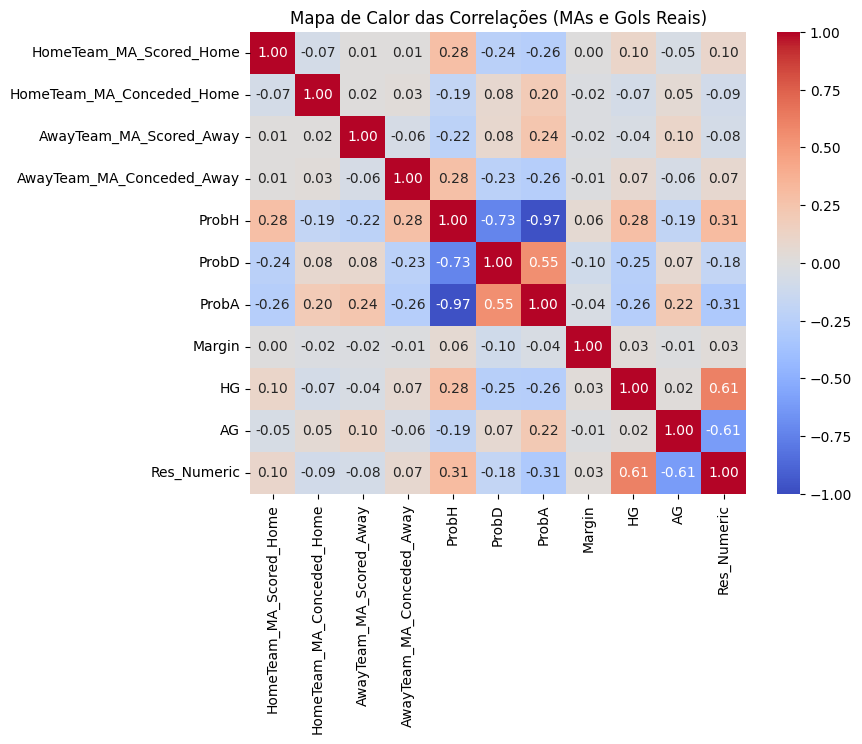

In [20]:
print("DataFrame de Exemplo (primeiras linhas):")
print(df.head())

# Colunas de Média Móvel
ma_cols = ['HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home',
           'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away']
# Colunas de Gols Reais
goal_cols = ['HG', 'AG','Res_Numeric']

# Colunas de Probabilidades
prob_cols = ['ProbH', 'ProbD','ProbA','Margin']

# Mapear os resutados em uma nova coluna
map_res_to_numeric = {
    'H': 1,
    'D': 0,
    'A': -1
}

# Aplicar o mapeamento para criar a nova coluna
df['Res_Numeric'] = df['Res'].map(map_res_to_numeric)

# --- 1. Análise de Correlação (entre MAs e Gols Reais) ---
print("\n--- 1. Análise de Correlação ---")
correlations = df[ma_cols + prob_cols + goal_cols ].corr()

# Correlações específicas de interesse:
print("\nCorrelação entre HomeTeam_MA_Scored_Home e HG:", correlations.loc['HomeTeam_MA_Scored_Home', 'HG'])
print("Correlação entre HomeTeam_MA_Conceded_Home e AG:", correlations.loc['HomeTeam_MA_Conceded_Home', 'AG'])
print("Correlação entre AwayTeam_MA_Scored_Away e AG:", correlations.loc['AwayTeam_MA_Scored_Away', 'AG'])
print("Correlação entre AwayTeam_MA_Conceded_Away e HG:", correlations.loc['AwayTeam_MA_Conceded_Away', 'HG'])

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor das Correlações (MAs e Gols Reais)')
plt.show()



--- 2. Análise Agrupada por Resultado (Res) ---

Valores Médios das MAs por Resultado da Partida:
     HomeTeam_MA_Scored_Home  HomeTeam_MA_Conceded_Home  AwayTeam_MA_Scored_Away  AwayTeam_MA_Conceded_Away
Res                                                                                                        
A                   1.327475                   1.021819                 1.003056                   1.361391
D                   1.385324                   0.968268                 0.986006                   1.378116
H                   1.476757                   0.914852                 0.911503                   1.465871


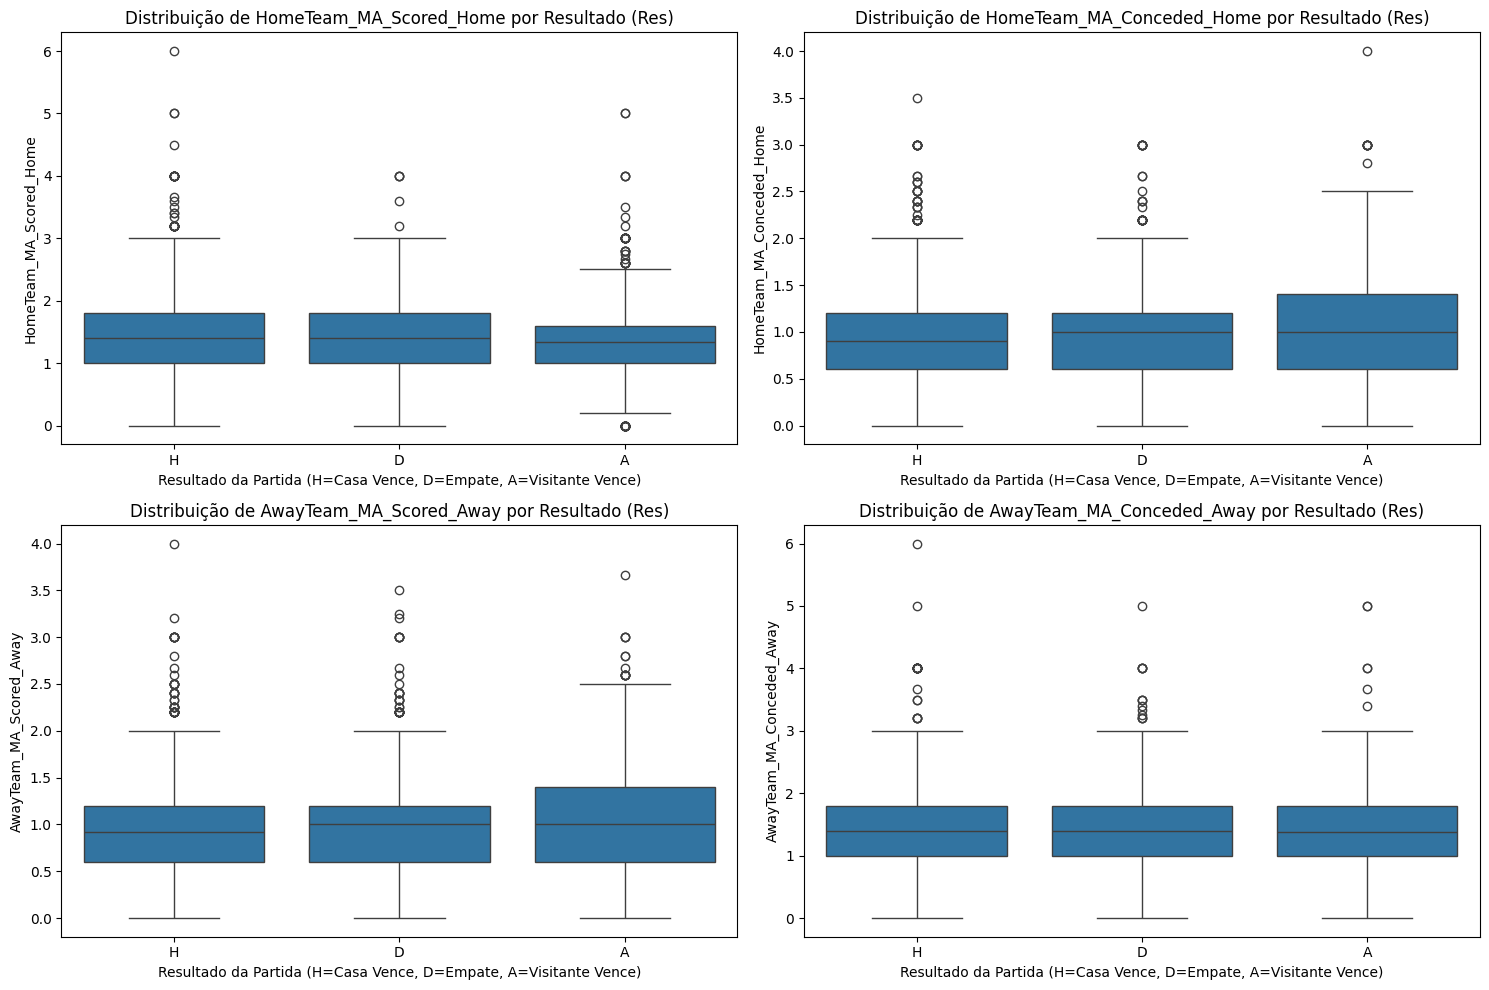

In [21]:
# --- 2. Análise Agrupada por Resultado (Res) ---
print("\n--- 2. Análise Agrupada por Resultado (Res) ---")
# Médias das MAs para cada tipo de resultado
grouped_by_res = df.groupby('Res')[ma_cols].mean()
print("\nValores Médios das MAs por Resultado da Partida:")
print(grouped_by_res)

# Boxplots para visualizar a distribuição das MAs por resultado
plt.figure(figsize=(15, 10))
for i, col in enumerate(ma_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Res', y=col, data=df, order=['H', 'D', 'A'])
    plt.title(f'Distribuição de {col} por Resultado (Res)')
    plt.xlabel('Resultado da Partida (H=Casa Vence, D=Empate, A=Visitante Vence)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


--- 3. Gráficos de Dispersão (MAs vs Gols Reais) ---


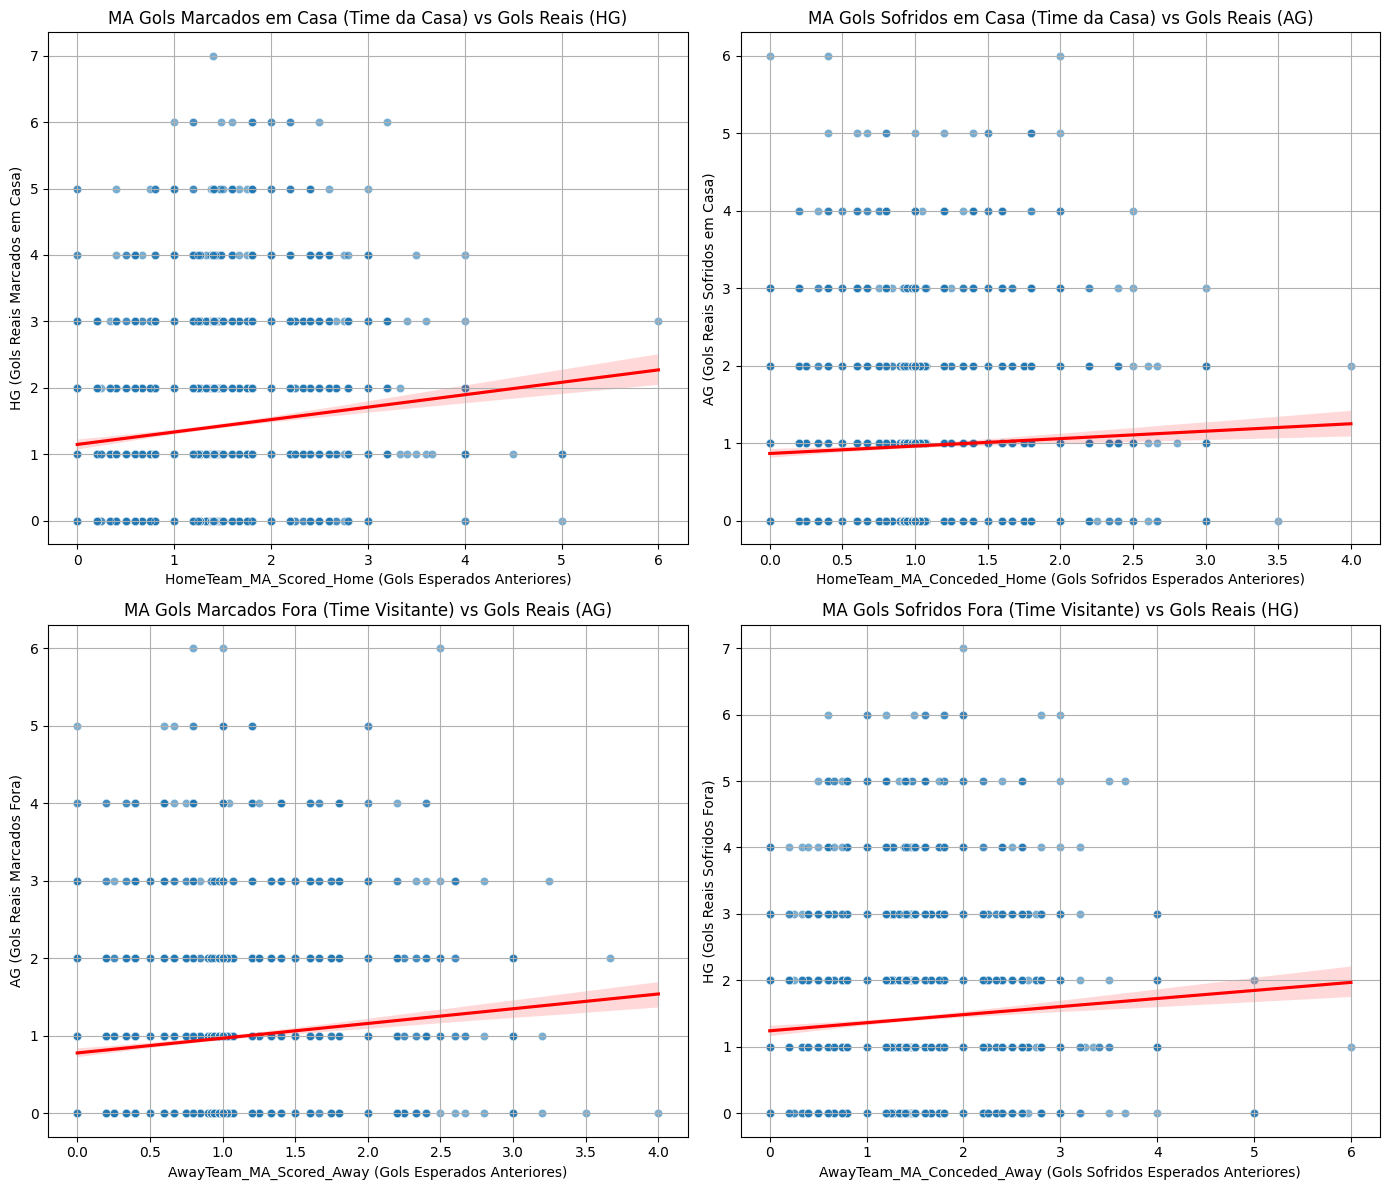

In [22]:
# --- 3. Visualizações: Gráficos de Dispersão (MAs vs Gols Reais) ---
print("\n--- 3. Gráficos de Dispersão (MAs vs Gols Reais) ---")
plt.figure(figsize=(14, 12))

# HomeTeam_MA_Scored_Home vs HG
plt.subplot(2, 2, 1)
sns.scatterplot(x='HomeTeam_MA_Scored_Home', y='HG', data=df, alpha=0.6)
sns.regplot(x='HomeTeam_MA_Scored_Home', y='HG', data=df, scatter=False, color='red') # Linha de tendência
plt.title('MA Gols Marcados em Casa (Time da Casa) vs Gols Reais (HG)')
plt.xlabel('HomeTeam_MA_Scored_Home (Gols Esperados Anteriores)')
plt.ylabel('HG (Gols Reais Marcados em Casa)')
plt.grid(True)

# HomeTeam_MA_Conceded_Home vs AG
plt.subplot(2, 2, 2)
sns.scatterplot(x='HomeTeam_MA_Conceded_Home', y='AG', data=df, alpha=0.6)
sns.regplot(x='HomeTeam_MA_Conceded_Home', y='AG', data=df, scatter=False, color='red')
plt.title('MA Gols Sofridos em Casa (Time da Casa) vs Gols Reais (AG)')
plt.xlabel('HomeTeam_MA_Conceded_Home (Gols Sofridos Esperados Anteriores)')
plt.ylabel('AG (Gols Reais Sofridos em Casa)')
plt.grid(True)

# AwayTeam_MA_Scored_Away vs AG
plt.subplot(2, 2, 3)
sns.scatterplot(x='AwayTeam_MA_Scored_Away', y='AG', data=df, alpha=0.6)
sns.regplot(x='AwayTeam_MA_Scored_Away', y='AG', data=df, scatter=False, color='red')
plt.title('MA Gols Marcados Fora (Time Visitante) vs Gols Reais (AG)')
plt.xlabel('AwayTeam_MA_Scored_Away (Gols Esperados Anteriores)')
plt.ylabel('AG (Gols Reais Marcados Fora)')
plt.grid(True)

# AwayTeam_MA_Conceded_Away vs HG
plt.subplot(2, 2, 4)
sns.scatterplot(x='AwayTeam_MA_Conceded_Away', y='HG', data=df, alpha=0.6)
sns.regplot(x='AwayTeam_MA_Conceded_Away', y='HG', data=df, scatter=False, color='red')
plt.title('MA Gols Sofridos Fora (Time Visitante) vs Gols Reais (HG)')
plt.xlabel('AwayTeam_MA_Conceded_Away (Gols Sofridos Esperados Anteriores)')
plt.ylabel('HG (Gols Reais Sofridos Fora)')
plt.grid(True)

plt.tight_layout()
plt.show()


--- 4. Análise com Features de Diferença (Exemplo) ---

Médias das Diferenças de MAs por Resultado:
     MA_AttackHome_vs_DefenseAway  MA_AttackAway_vs_DefenseHome
Res                                                            
A                       -0.033916                     -0.018763
D                        0.007208                      0.017738
H                        0.010886                     -0.003349


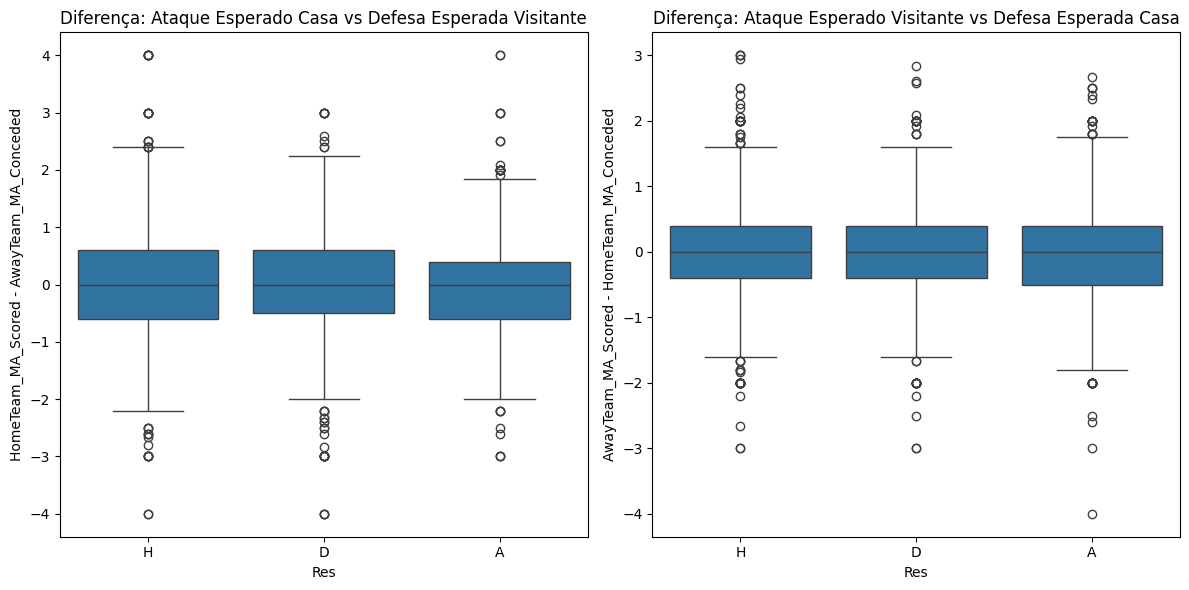


--- Interpretação Esperada ---
Para gols (HG, AG):
  - Espera-se correlação POSITIVA entre HomeTeam_MA_Scored_Home e HG.
  - Espera-se correlação POSITIVA entre HomeTeam_MA_Conceded_Home e AG.
  - Espera-se correlação POSITIVA entre AwayTeam_MA_Scored_Away e AG.
  - Espera-se correlação POSITIVA entre AwayTeam_MA_Conceded_Away e HG.

Para resultados (Res):
  - Quando Res='H' (Vitória Casa):
    - HomeTeam_MA_Scored_Home deveria ser ALTA.
    - HomeTeam_MA_Conceded_Home deveria ser BAIXA (relativamente).
    - AwayTeam_MA_Scored_Away deveria ser BAIXA (relativamente).
    - AwayTeam_MA_Conceded_Away deveria ser ALTA.
  - O oposto para Res='A' (Vitória Visitante).
  - Para Res='D' (Empate), os valores das MAs podem ser mais equilibrados ou baixos para ambos os lados.

Para as features de diferença:
  - MA_AttackHome_vs_DefenseAway: Espera-se que seja mais POSITIVA para vitórias em casa (H).
  - MA_AttackAway_vs_DefenseHome: Espera-se que seja mais POSITIVA para vitórias fora (A).


In [23]:
# --- 4. Análise com Features de Diferença (Exemplo) ---
print("\n--- 4. Análise com Features de Diferença (Exemplo) ---")
# Diferença entre a "força de ataque esperada" do time da casa e a "fraqueza de defesa esperada" do time visitante
df['MA_AttackHome_vs_DefenseAway'] = df['HomeTeam_MA_Scored_Home'] - df['AwayTeam_MA_Conceded_Away']
# Diferença entre a "força de ataque esperada" do time visitante e a "fraqueza de defesa esperada" do time da casa
df['MA_AttackAway_vs_DefenseHome'] = df['AwayTeam_MA_Scored_Away'] - df['HomeTeam_MA_Conceded_Home']

print("\nMédias das Diferenças de MAs por Resultado:")
print(df.groupby('Res')[['MA_AttackHome_vs_DefenseAway', 'MA_AttackAway_vs_DefenseHome']].mean())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Res', y='MA_AttackHome_vs_DefenseAway', data=df, order=['H', 'D', 'A'])
plt.title('Diferença: Ataque Esperado Casa vs Defesa Esperada Visitante')
plt.ylabel('HomeTeam_MA_Scored - AwayTeam_MA_Conceded')

plt.subplot(1, 2, 2)
sns.boxplot(x='Res', y='MA_AttackAway_vs_DefenseHome', data=df, order=['H', 'D', 'A'])
plt.title('Diferença: Ataque Esperado Visitante vs Defesa Esperada Casa')
plt.ylabel('AwayTeam_MA_Scored - HomeTeam_MA_Conceded')

plt.tight_layout()
plt.show()

print("\n--- Interpretação Esperada ---")
print("Para gols (HG, AG):")
print("  - Espera-se correlação POSITIVA entre HomeTeam_MA_Scored_Home e HG.")
print("  - Espera-se correlação POSITIVA entre HomeTeam_MA_Conceded_Home e AG.")
print("  - Espera-se correlação POSITIVA entre AwayTeam_MA_Scored_Away e AG.")
print("  - Espera-se correlação POSITIVA entre AwayTeam_MA_Conceded_Away e HG.")
print("\nPara resultados (Res):")
print("  - Quando Res='H' (Vitória Casa):")
print("    - HomeTeam_MA_Scored_Home deveria ser ALTA.")
print("    - HomeTeam_MA_Conceded_Home deveria ser BAIXA (relativamente).")
print("    - AwayTeam_MA_Scored_Away deveria ser BAIXA (relativamente).")
print("    - AwayTeam_MA_Conceded_Away deveria ser ALTA.")
print("  - O oposto para Res='A' (Vitória Visitante).")
print("  - Para Res='D' (Empate), os valores das MAs podem ser mais equilibrados ou baixos para ambos os lados.")
print("\nPara as features de diferença:")
print("  - MA_AttackHome_vs_DefenseAway: Espera-se que seja mais POSITIVA para vitórias em casa (H).")
print("  - MA_AttackAway_vs_DefenseHome: Espera-se que seja mais POSITIVA para vitórias fora (A).")

In [24]:
print(df)

     Country   League  Season       Date   Time           Home         Away  HG  AG Res  PSCH  PSCD   PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  LgAvg_HG_Season  LgAvg_AG_Season  Prev_LgAvg_HG_Season  Prev_LgAvg_AG_Season  LgAvg_HG_Expanding_Shifted  LgAvg_AG_Expanding_Shifted  TA_LgAvg_HG_Season  TA_LgAvg_AG_Season  HomeTeam_MA_Scored_Home  HomeTeam_MA_Conceded_Home  AwayTeam_MA_Scored_Away  AwayTeam_MA_Conceded_Away     ProbH     ProbD     ProbA  sum_probs    Margin  Res_Numeric  MA_AttackHome_vs_DefenseAway  MA_AttackAway_vs_DefenseHome
20    Brazil  Serie A    2012 2012-06-06  23:30    Atletico Go       Gremio   0   1   A  2.31  3.56   3.25   2.40   3.56   3.27   2.28   3.26   2.96         1.471053         1.002632                   NaN                   NaN                    1.150000                    0.900000            1.150000            0.900000                     1.00                       1.00                      1.0                        2.0  0.423792  0.274989  0

In [25]:
from scipy.stats import poisson
import numpy as np

def calcular_probabilidades_poisson(row, max_goals=6):
    # 1. Estimar lambdas
    lambda_home = (row['HomeTeam_MA_Scored_Home'] + row['AwayTeam_MA_Conceded_Away']) / 2
    lambda_away = (row['AwayTeam_MA_Scored_Away'] + row['HomeTeam_MA_Conceded_Home']) / 2

    # 2. Distribuições de Poisson de 0 a 6 gols
    probs_home = [poisson.pmf(i, lambda_home) for i in range(max_goals + 1)]
    probs_away = [poisson.pmf(i, lambda_away) for i in range(max_goals + 1)]

    # 3. Matriz de placares
    matriz_prob = np.outer(probs_home, probs_away)

    # 4. Probabilidades agregadas
    prob_home_win = np.tril(matriz_prob, k=-1).sum()
    prob_draw     = np.trace(matriz_prob)
    prob_away_win = np.triu(matriz_prob, k=1).sum()

    return pd.Series({
        'Poisson_ProbH': prob_home_win,
        'Poisson_ProbD': prob_draw,
        'Poisson_ProbA': prob_away_win,
        'lambda_home': lambda_home,
        'lambda_away': lambda_away
    })

In [26]:
df[['Poisson_ProbHome', 'Poisson_ProbDraw', 'Poisson_ProbAway', 'lambda_H', 'lambda_A']] = df.apply(calcular_probabilidades_poisson, axis=1)

In [27]:
df[['Home','Away','Poisson_ProbHome','ProbH', 'Poisson_ProbDraw','ProbD', 'Poisson_ProbAway','ProbA', 'lambda_H', 'lambda_A']].tail(20)

,Home,Away,Poisson_ProbHome,ProbH,Poisson_ProbDraw,ProbD,Poisson_ProbAway,ProbA,lambda_H,lambda_A
5028,Internacional,Mirassol,0.589132,0.558392,0.232947,0.257605,0.175693,0.184003,1.750,0.833333
5029,Fluminense,Vasco,0.643793,0.526897,0.226189,0.279484,0.127812,0.193619,1.750,0.625000
5030,Sao Paulo,Mirassol,0.453700,0.560277,0.299972,0.272996,0.246057,0.166726,1.200,0.800000
5031,Atletico-Mg,Corinthians,0.637556,0.555306,0.216238,0.276067,0.142985,0.168627,1.875,0.750000
5032,Gremio,Bahia,0.449597,0.393304,0.290433,0.299544,0.259614,0.307152,1.250,0.875000
5033,Palmeiras,Flamengo Rj,0.316269,0.431867,0.367434,0.308084,0.316269,0.260049,0.750,0.750000
5034,Sport Recife,Internacional,0.325660,0.373260,0.275646,0.313878,0.398163,0.312862,1.125,1.275000
5035,Vitoria,Santos,0.517679,0.426600,0.267815,0.312381,0.213719,0.261019,1.450,0.825000
5036,Fortaleza,Cruzeiro,0.549238,0.420513,0.247460,0.307041,0.201808,0.272445,1.625,0.875000
5037,Bragantino,Juventude,0.801239,0.665445,0.127761,0.218302,0.053828,0.116252,2.600,0.525000


Total de partidas: 5028
  Odds_Faixa  Prob_Real  Prob_Normalizada_Poisson  Prob_Normalizada  Num_Jogos
0    Faixa 1   0.715128                  0.585455          0.705125        509
1    Faixa 2   0.661479                  0.537547          0.619921        514
2    Faixa 3   0.557915                  0.530786          0.570741        518
3    Faixa 4   0.548729                  0.499156          0.527630        472
4    Faixa 5   0.506692                  0.472602          0.484996        523
5    Faixa 6   0.482966                  0.468366          0.445601        499
6    Faixa 7   0.450505                  0.449468          0.408125        495
7    Faixa 8   0.365657                  0.419196          0.369134        495
8    Faixa 9   0.343313                  0.392108          0.321087        501
9   Faixa 10   0.209163                  0.350709          0.231799        502


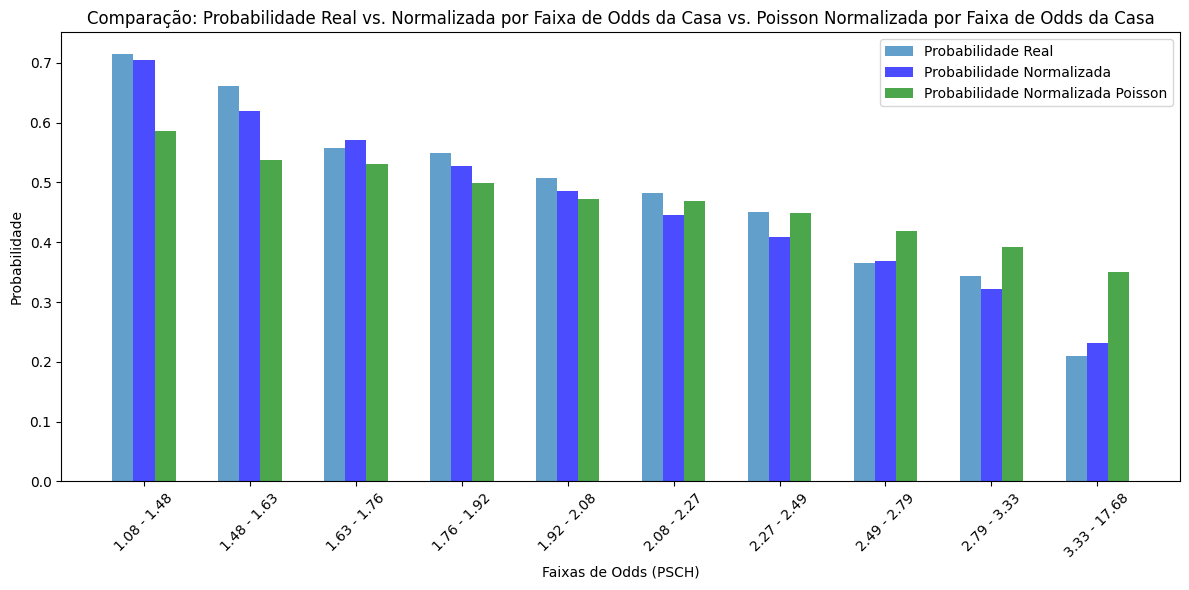

In [28]:
# Criar faixas de odds balanceadas usando PSCH (Odds da Casa)
df['Odds_Faixa'], bins = pd.qcut(df['PSCH'], q=10, retbins=True, labels=[f'Faixa {i+1}' for i in range(10)])

# Marcar vitória em casa como 1, outras como 0
df['Vitoria_Casa'] = (df['Res'] == 'H').astype(int)

# Calcular probabilidade real por faixa (frequência de vitórias em casa)
real_prob = df.groupby('Odds_Faixa', observed=True)['Vitoria_Casa'].mean()

# Calcular média da probabilidade normalizada por faixa
norm_prob_poisson = df.groupby('Odds_Faixa', observed=True)['Poisson_ProbHome'].mean()
norm_prob = df.groupby('Odds_Faixa', observed=True)['ProbH'].mean()

counts = df.groupby('Odds_Faixa', observed=True).size()

# Criar DataFrame comparativo
comparacao_prob = pd.DataFrame({
    'Prob_Real': real_prob,
    'Prob_Normalizada_Poisson': norm_prob_poisson,
    'Prob_Normalizada': norm_prob,
    'Num_Jogos': counts
}).reset_index()

total_partidas = counts.sum()
print(f"Total de partidas: {total_partidas}")
print(comparacao_prob)


# Criar rótulos com os ranges das odds
ranges = [f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins) - 1)]
comparacao_prob['Odds_Range'] = ranges

# Plotando gráfico de barras lado a lado
plt.figure(figsize=(12, 6))
x = range(len(comparacao_prob))

plt.bar(x, comparacao_prob['Prob_Real'], width=0.2, label='Probabilidade Real', alpha=0.7)
plt.bar([p + 0.2 for p in x], comparacao_prob['Prob_Normalizada'], width=0.2, label='Probabilidade Normalizada', color='blue', alpha=0.7)
plt.bar([p + 0.4 for p in x], comparacao_prob['Prob_Normalizada_Poisson'], width=0.2, label='Probabilidade Normalizada Poisson', color='green', alpha=0.7)

# Ajustar eixo X com os ranges de odds
plt.xticks([p + 0.2 for p in x], comparacao_prob['Odds_Range'], rotation=45)
plt.xlabel('Faixas de Odds (PSCH)')
plt.ylabel('Probabilidade')
plt.title('Comparação: Probabilidade Real vs. Normalizada por Faixa de Odds da Casa vs. Poisson Normalizada por Faixa de Odds da Casa')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd # Adicionado para o caso de o df não estar definido globalmente no seu script
import numpy as np  # Adicionado para np.nan e np.outer
from scipy.stats import poisson

# Supondo que 'df' seja seu DataFrame já processado e contenha as colunas:
# 'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home',
# 'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away',
# 'TA_LgAvg_HG_Season', 'TA_LgAvg_AG_Season'
# E que essas colunas não possuem NaNs para as linhas que serão processadas (já tratadas antes).

# --- PASSO 1: Calcular Lambdas (Gols Esperados) ---
def calculate_lambdas_from_df(row, row_index=None): # Adicionado row_index para rastreamento
    """Calcula lambda_home e lambda_away para uma partida (linha do DataFrame)."""
    epsilon = 1e-9 # Para evitar divisão por zero

    # Inputs para debug:
    # if row_index is not None and (pd.isnull(row['TA_LgAvg_HG_Season']) or pd.isnull(row['TA_LgAvg_AG_Season'])):
    #     print(f"DEBUG (calculate_lambdas): Index {row_index}, TA_LgAvg_HG_Season={row['TA_LgAvg_HG_Season']}, TA_LgAvg_AG_Season={row['TA_LgAvg_AG_Season']}")

    # Forças relativas de ataque e defesa
    att_home = row['HomeTeam_MA_Scored_Home'] / (row['TA_LgAvg_HG_Season'] + epsilon)
    def_home = row['HomeTeam_MA_Conceded_Home'] / (row['TA_LgAvg_AG_Season'] + epsilon)

    att_away = row['AwayTeam_MA_Scored_Away'] / (row['TA_LgAvg_AG_Season'] + epsilon)
    def_away = row['AwayTeam_MA_Conceded_Away'] / (row['TA_LgAvg_HG_Season'] + epsilon)

    # Lambdas - CORREÇÃO AQUI: Usar TA_LgAvg consistentemente
    lambda_home = att_home * def_away * row['TA_LgAvg_HG_Season'] # CORRIGIDO
    lambda_away = att_away * def_home * row['TA_LgAvg_AG_Season'] # CORRIGIDO

    # Rastrear lambdas problemáticos
    if pd.isnull(lambda_home) or pd.isnull(lambda_away) or lambda_home < 0 or lambda_away < 0:
        if row_index is not None: # Apenas imprime se o índice for fornecido
            print(f"ALERTA (calculate_lambdas): Lambdas problemáticos no índice {row_index}")
            print(f"  Inputs: MA_H_S={row['HomeTeam_MA_Scored_Home']:.2f}, MA_H_C={row['HomeTeam_MA_Conceded_Home']:.2f}, MA_A_S={row['AwayTeam_MA_Scored_Away']:.2f}, MA_A_C={row['AwayTeam_MA_Conceded_Away']:.2f}")
            print(f"          TA_LgAvg_HG={row['TA_LgAvg_HG_Season']:.2f}, TA_LgAvg_AG={row['TA_LgAvg_AG_Season']:.2f}")
            print(f"  Forças: att_h={att_home:.2f}, def_h={def_home:.2f}, att_a={att_away:.2f}, def_a={def_away:.2f}")
            print(f"  Lambdas: home={lambda_home}, away={lambda_away}")
        # Se lambdas forem NaN, podem causar problemas adiante. Garantir que não sejam negativos.
        if pd.isnull(lambda_home) or lambda_home < 0: lambda_home = epsilon
        if pd.isnull(lambda_away) or lambda_away < 0: lambda_away = epsilon

    return pd.Series([lambda_home, lambda_away], index=['lambda_home', 'lambda_away'])

# Aplicar a função para cada linha para obter os lambdas
# Para rastrear, podemos iterar e passar o índice
lambda_results = []
for index, row in df.iterrows():
    lambdas = calculate_lambdas_from_df(row, row_index=index)
    lambda_results.append(lambdas)

lambda_cols_df = pd.DataFrame(lambda_results, index=df.index)
df = pd.concat([df, lambda_cols_df], axis=1)

print("DataFrame com Lambdas Calculadas:")
print(df[['Home', 'Away', 'lambda_home', 'lambda_away']].head())


# --- PASSO 2: Calcular Probabilidades de Resultado (H/D/A) com o Modelo de Poisson ---
MAX_GOALS_CONSIDERED = 6

def get_poisson_match_outcome_probabilities(lambda_h, lambda_a, max_goals=MAX_GOALS_CONSIDERED, row_index=None):
    """
    Calcula as probabilidades de Vitória da Casa (H), Empate (D) e Vitória Visitante (A)
    dadas as taxas de gols esperados (lambdas) para cada time.
    """
    # Garantir que lambdas não sejam NaN para a função poisson.pmf
    if pd.isnull(lambda_h): lambda_h = 1e-9 # Um lambda muito pequeno se NaN
    if pd.isnull(lambda_a): lambda_a = 1e-9 # Um lambda muito pequeno se NaN
    if lambda_h < 0: lambda_h = 1e-9 # pmf não aceita lambda negativo
    if lambda_a < 0: lambda_a = 1e-9 # pmf não aceita lambda negativo


    prob_home_score = [poisson.pmf(i, lambda_h) for i in range(max_goals + 1)]
    prob_away_score = [poisson.pmf(i, lambda_a) for i in range(max_goals + 1)]

    score_probability_matrix = np.outer(prob_home_score, prob_away_score)

    prob_h_win = np.sum(np.tril(score_probability_matrix, -1))
    prob_draw  = np.sum(np.diag(score_probability_matrix))
    prob_a_win = np.sum(np.triu(score_probability_matrix, 1))

    total_calculated_prob = prob_h_win + prob_draw + prob_a_win

    # Rastreamento e correção da normalização
    if total_calculated_prob == 0 or pd.isnull(total_calculated_prob):
        if row_index is not None: # Apenas imprime se o índice for fornecido
            print(f"ALERTA (get_poisson_probs): total_calculated_prob é zero ou NaN no índice {row_index}")
            print(f"  Lambdas: home={lambda_h:.4f}, away={lambda_a:.4f}")
            print(f"  Probs (H,D,A antes norm): {prob_h_win:.4f}, {prob_draw:.4f}, {prob_a_win:.4f}")
            # print(f"  Matriz de Prob de Placar (soma): {np.sum(score_probability_matrix)}")
        # Fallback para evitar divisão por zero e NaNs resultantes
        print("deu erro ",prob_h_win,prob_draw,prob_a_win,total_calculated_prob)
        prob_h_win, prob_draw, prob_a_win = 1/3, 1/3, 1/3
    else: # Restaurada a verificação
        prob_h_win /= total_calculated_prob
        prob_draw  /= total_calculated_prob
        prob_a_win /= total_calculated_prob

    return prob_h_win, prob_draw, prob_a_win

# Aplicar a função para cada linha para obter as probabilidades do modelo de Poisson
poisson_probs_list = []
for index, row in df.iterrows():
    # Passar o índice para a função de rastreamento
    p_h, p_d, p_a = get_poisson_match_outcome_probabilities(row['lambda_home'], row['lambda_away'], row_index=index)
    poisson_probs_list.append({'Poisson_ProbH': p_h, 'Poisson_ProbD': p_d, 'Poisson_ProbA': p_a})

poisson_probs_df = pd.DataFrame(poisson_probs_list, index=df.index)
df = pd.concat([df, poisson_probs_df], axis=1)

print("\nDataFrame com Probabilidades do Modelo de Poisson Adicionadas:")
cols_to_display = ['Home', 'Away', 'lambda_home', 'lambda_away',
                   'Poisson_ProbH', 'Poisson_ProbD', 'Poisson_ProbA']
if all(col in df.columns for col in ['ProbH', 'ProbD', 'ProbA']): # Se as colunas originais de prob existirem
    cols_to_display.extend(['ProbH', 'ProbD', 'ProbA'])
print(df[cols_to_display].head())

# Verificar se há NaNs nas probabilidades de Poisson resultantes
print("\nVerificando NaNs nas probabilidades de Poisson calculadas:")
print(df[['Poisson_ProbH', 'Poisson_ProbD', 'Poisson_ProbA']].isnull().sum())

DataFrame com Lambdas Calculadas:
            Home        Away  lambda_home  lambda_away
20   Atletico Go      Gremio     1.739130     1.111111
21  Sport Recife   Palmeiras     0.913043     0.000000
22   Atletico-Mg       Bahia     0.880000     0.000000
23      Coritiba  Portuguesa     1.769231     3.285714
24         Vasco     Nautico     3.428571     1.142857

DataFrame com Probabilidades do Modelo de Poisson Adicionadas:
            Home        Away  lambda_home  lambda_away  Poisson_ProbH  Poisson_ProbD  Poisson_ProbA     ProbH     ProbD     ProbA
20   Atletico Go      Gremio     1.739130     1.111111       0.519804       0.237212       0.242984  0.423792  0.274989  0.301219
21  Sport Recife   Palmeiras     0.913043     0.000000       0.598680       0.401320       0.000000  0.373649  0.288779  0.337572
22   Atletico-Mg       Bahia     0.880000     0.000000       0.585201       0.414799       0.000000  0.669952  0.214974  0.115074
23      Coritiba  Portuguesa     1.769231     3.2857

In [30]:
df[['Home','Away','Poisson_ProbH','ProbH', 'Poisson_ProbD','ProbD', 'Poisson_ProbA','ProbA', 'lambda_home', 'lambda_away']].tail(20)

,Home,Away,Poisson_ProbH,ProbH,Poisson_ProbD,ProbD,Poisson_ProbA,ProbA,lambda_home,lambda_away
5028,Internacional,Mirassol,0.630325,0.558392,0.210785,0.257605,0.158890,0.184003,1.977778,0.872549
5029,Fluminense,Vasco,0.729898,0.526897,0.188940,0.279484,0.081162,0.193619,1.985294,0.489130
5030,Sao Paulo,Mirassol,0.370521,0.560277,0.338837,0.272996,0.290642,0.166726,0.923188,0.780000
5031,Atletico-Mg,Corinthians,0.738544,0.555306,0.170819,0.276067,0.090637,0.168627,2.250000,0.638889
5032,Gremio,Bahia,0.355879,0.393304,0.310377,0.299544,0.333744,0.307152,1.010870,0.968750
5033,Palmeiras,Flamengo Rj,0.226091,0.431867,0.527914,0.308084,0.245996,0.260049,0.380396,0.407986
5034,Sport Recife,Internacional,0.063487,0.373260,0.202512,0.313878,0.734001,0.312862,0.341727,1.797297
5035,Vitoria,Santos,0.564860,0.426600,0.269671,0.312381,0.165469,0.261019,1.440000,0.640000
5036,Fortaleza,Cruzeiro,0.595474,0.420513,0.234647,0.307041,0.169879,0.272445,1.732143,0.797697
5037,Bragantino,Juventude,0.929712,0.665445,0.058329,0.218302,0.011959,0.116252,3.360000,0.251282


Total de partidas: 5028
  Odds_Faixa  Prob_Real  Prob_Normalizada_Poisson  Prob_Normalizada  Num_Jogos
0    Faixa 1   0.715128                  0.647894          0.705125        509
1    Faixa 2   0.661479                  0.576243          0.619921        514
2    Faixa 3   0.557915                  0.555010          0.570741        518
3    Faixa 4   0.548729                  0.497984          0.527630        472
4    Faixa 5   0.506692                  0.452342          0.484996        523
5    Faixa 6   0.482966                  0.450476          0.445601        499
6    Faixa 7   0.450505                  0.413775          0.408125        495
7    Faixa 8   0.365657                  0.366622          0.369134        495
8    Faixa 9   0.343313                  0.319575          0.321087        501
9   Faixa 10   0.209163                  0.267192          0.231799        502


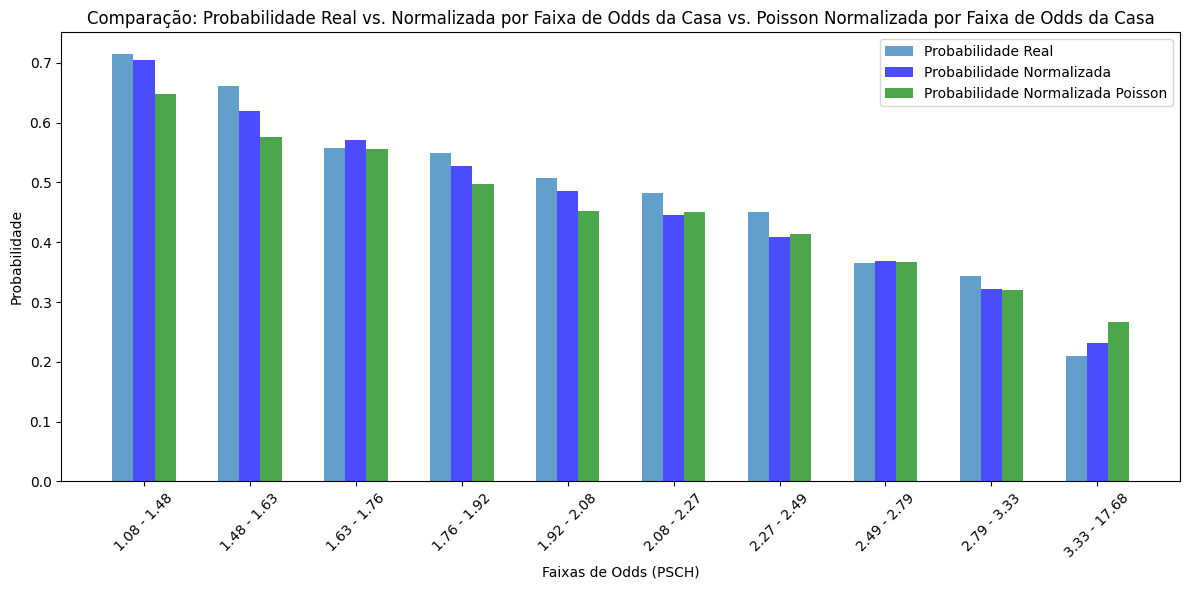

In [31]:
# Criar faixas de odds balanceadas usando PSCH (Odds da Casa)
df['Odds_Faixa'], bins = pd.qcut(df['PSCH'], q=10, retbins=True, labels=[f'Faixa {i+1}' for i in range(10)])

# Marcar vitória em casa como 1, outras como 0
df['Vitoria_Casa'] = (df['Res'] == 'H').astype(int)

# Calcular probabilidade real por faixa (frequência de vitórias em casa)
real_prob = df.groupby('Odds_Faixa', observed=True)['Vitoria_Casa'].mean()

# Calcular média da probabilidade normalizada por faixa
norm_prob_poisson = df.groupby('Odds_Faixa', observed=True)['Poisson_ProbH'].mean()
norm_prob = df.groupby('Odds_Faixa', observed=True)['ProbH'].mean()

counts = df.groupby('Odds_Faixa', observed=True).size()

# Criar DataFrame comparativo
comparacao_prob = pd.DataFrame({
    'Prob_Real': real_prob,
    'Prob_Normalizada_Poisson': norm_prob_poisson,
    'Prob_Normalizada': norm_prob,
    'Num_Jogos': counts
}).reset_index()

total_partidas = counts.sum()
print(f"Total de partidas: {total_partidas}")
print(comparacao_prob)


# Criar rótulos com os ranges das odds
ranges = [f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins) - 1)]
comparacao_prob['Odds_Range'] = ranges

# Plotando gráfico de barras lado a lado
plt.figure(figsize=(12, 6))
x = range(len(comparacao_prob))

plt.bar(x, comparacao_prob['Prob_Real'], width=0.2, label='Probabilidade Real', alpha=0.7)
plt.bar([p + 0.2 for p in x], comparacao_prob['Prob_Normalizada'], width=0.2, label='Probabilidade Normalizada', color='blue', alpha=0.7)
plt.bar([p + 0.4 for p in x], comparacao_prob['Prob_Normalizada_Poisson'], width=0.2, label='Probabilidade Normalizada Poisson', color='green', alpha=0.7)

# Ajustar eixo X com os ranges de odds
plt.xticks([p + 0.2 for p in x], comparacao_prob['Odds_Range'], rotation=45)
plt.xlabel('Faixas de Odds (PSCH)')
plt.ylabel('Probabilidade')
plt.title('Comparação: Probabilidade Real vs. Normalizada por Faixa de Odds da Casa vs. Poisson Normalizada por Faixa de Odds da Casa')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
print(df[df['Home']=='Vasco'][['Home','Away','lambda_home', 'lambda_away', 'Poisson_ProbH', 'Poisson_ProbD', 'Poisson_ProbA', 'ProbH', 'ProbD', 'ProbA']].tail(1))

       Home        Away  lambda_home  lambda_away  Poisson_ProbH  Poisson_ProbD  Poisson_ProbA     ProbH     ProbD     ProbA
5039  Vasco  Bragantino     1.118881     0.949367       0.393227       0.300905       0.305867  0.393257  0.297665  0.309077


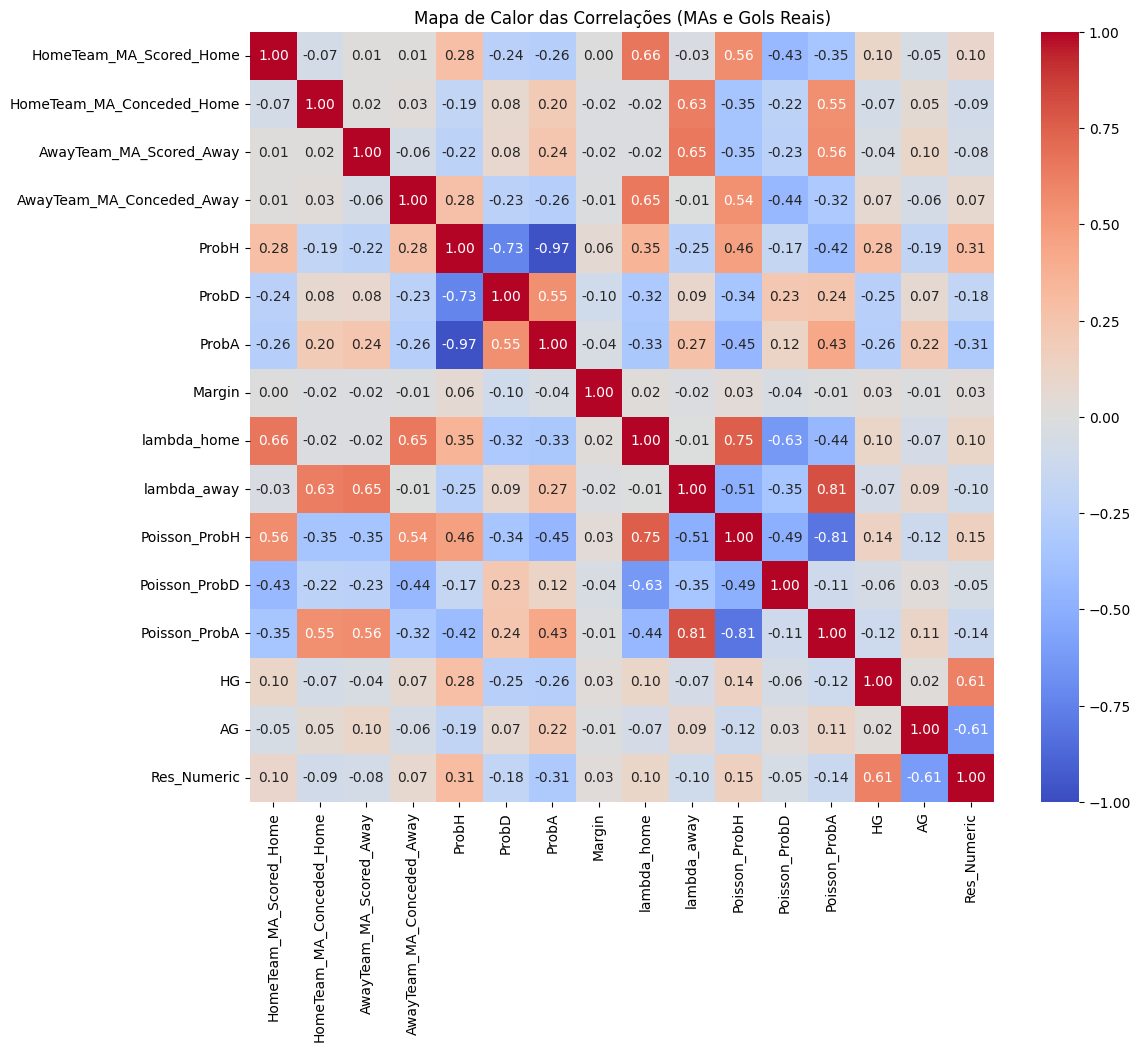

In [33]:
poisson_cols = ['lambda_home', 'lambda_away', 'Poisson_ProbH', 'Poisson_ProbD', 'Poisson_ProbA']

correlations = df[ma_cols + prob_cols + poisson_cols + goal_cols ].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor das Correlações (MAs e Gols Reais)')
plt.show()

In [34]:
print(df.columns)

Index(['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away', 'HG',
       'AG', 'Res', 'PSCH', 'PSCD', 'PSCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH',
       'AvgCD', 'AvgCA', 'LgAvg_HG_Season', 'LgAvg_AG_Season',
       'Prev_LgAvg_HG_Season', 'Prev_LgAvg_AG_Season',
       'LgAvg_HG_Expanding_Shifted', 'LgAvg_AG_Expanding_Shifted',
       'TA_LgAvg_HG_Season', 'TA_LgAvg_AG_Season', 'HomeTeam_MA_Scored_Home',
       'HomeTeam_MA_Conceded_Home', 'AwayTeam_MA_Scored_Away',
       'AwayTeam_MA_Conceded_Away', 'ProbH', 'ProbD', 'ProbA', 'sum_probs',
       'Margin', 'Res_Numeric', 'MA_AttackHome_vs_DefenseAway',
       'MA_AttackAway_vs_DefenseHome', 'Poisson_ProbHome', 'Poisson_ProbDraw',
       'Poisson_ProbAway', 'lambda_H', 'lambda_A', 'Odds_Faixa',
       'Vitoria_Casa', 'lambda_home', 'lambda_away', 'Poisson_ProbH',
       'Poisson_ProbD', 'Poisson_ProbA'],
      dtype='object')


In [35]:
print(df)

     Country   League  Season       Date   Time           Home         Away  HG  AG Res  PSCH  PSCD   PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  LgAvg_HG_Season  LgAvg_AG_Season  Prev_LgAvg_HG_Season  Prev_LgAvg_AG_Season  LgAvg_HG_Expanding_Shifted  LgAvg_AG_Expanding_Shifted  TA_LgAvg_HG_Season  TA_LgAvg_AG_Season  HomeTeam_MA_Scored_Home  HomeTeam_MA_Conceded_Home  AwayTeam_MA_Scored_Away  AwayTeam_MA_Conceded_Away     ProbH     ProbD     ProbA  sum_probs    Margin  Res_Numeric  MA_AttackHome_vs_DefenseAway  MA_AttackAway_vs_DefenseHome  Poisson_ProbHome  Poisson_ProbDraw  Poisson_ProbAway  lambda_H  lambda_A Odds_Faixa  Vitoria_Casa  lambda_home  lambda_away  Poisson_ProbH  Poisson_ProbD  Poisson_ProbA
20    Brazil  Serie A    2012 2012-06-06  23:30    Atletico Go       Gremio   0   1   A  2.31  3.56   3.25   2.40   3.56   3.27   2.28   3.26   2.96         1.471053         1.002632                   NaN                   NaN                    1.150000                    0.900


Shape das features X: (5028, 27)
Shape do target y: (5028,)

Shape de X_train: (4022, 27), y_train: (4022,)
Shape de X_test: (1006, 27), y_test: (1006,)

Treinando o modelo RandomForestClassifier...
Fazendo predições no conjunto de teste...

OOB Score (estimativa de acurácia no treino): 0.4816

--- Avaliação do Modelo no Conjunto de Teste ---
Acurácia: 0.4871

Relatório de Classificação:
                   precision    recall  f1-score   support

Derrota Casa (-1)       0.43      0.26      0.32       267
       Empate (0)       0.31      0.19      0.23       264
 Vitória Casa (1)       0.54      0.78      0.64       475

         accuracy                           0.49      1006
        macro avg       0.43      0.41      0.40      1006
     weighted avg       0.45      0.49      0.45      1006


Matriz de Confusão:


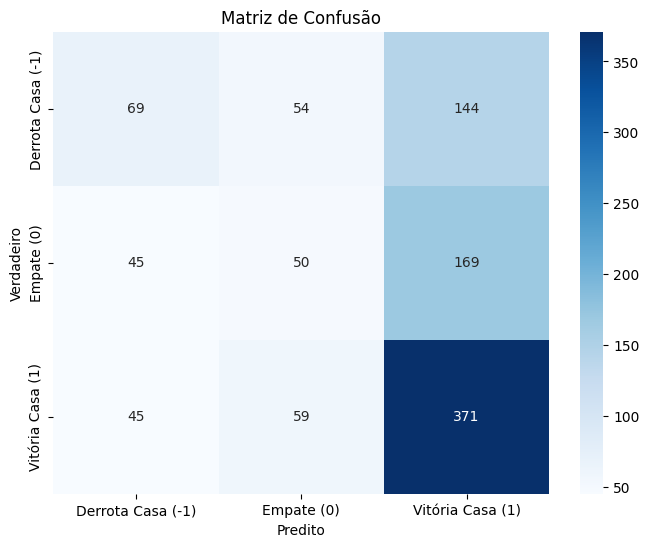


Importância das Features:
TA_LgAvg_HG_Season    0.048866
TA_LgAvg_AG_Season    0.047879
ProbA                 0.042971
AvgCA                 0.042943
ProbH                 0.041165
lambda_home           0.041035
MaxCA                 0.040942
sum_probs             0.040674
Margin                0.040628
Poisson_ProbH         0.040273
dtype: float64


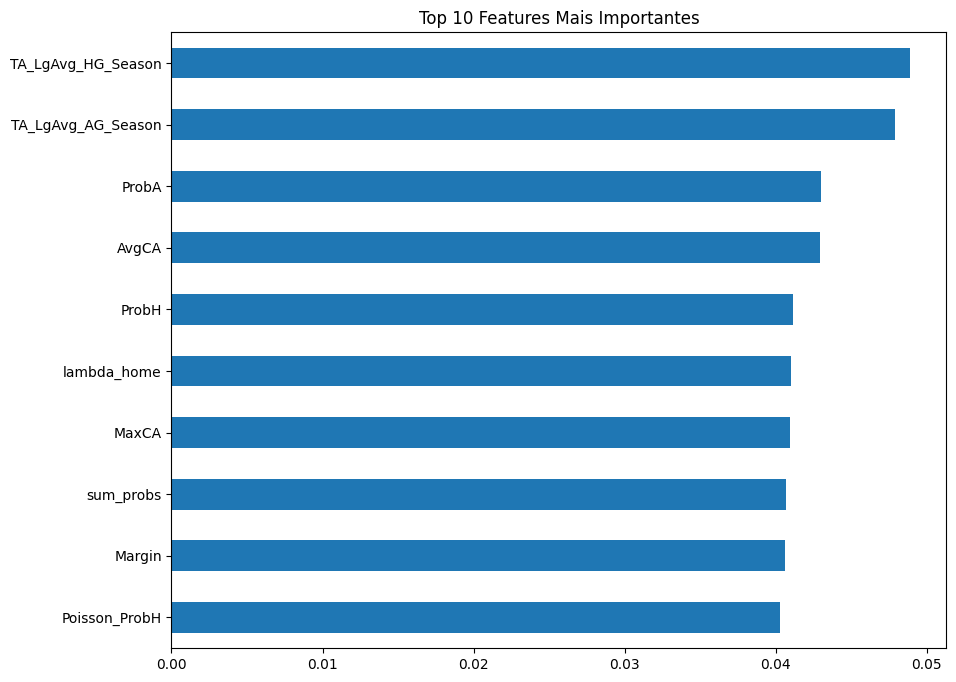

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- PASSO 0 ---

# Ordenar por data é importante para o split cronológico
df = df.sort_values(by='Date')


# --- PASSO 1: Seleção de Features e Target ---
# Target (o que queremos prever)
y = df['Res_Numeric']

# Features (colunas que usaremos para prever)
# Escolha features que você acredita serem preditivas e que NÃO causam data leakage.
# Evite: HG, AG, Res (diretamente o resultado), Home, Away (nomes dos times, a menos que codificados), Date, Time.
# As odds (AvgCH,D,A) e as probabilidades do Poisson são boas candidatas.
feature_cols = [
    'AvgCH', 'AvgCD', 'AvgCA',                  # Odds médias do mercado
    'MaxCH', 'MaxCD', 'MaxCA',                  # Odds máximas
    'PSCH', 'PSCD', 'PSCA',                     # odds
    'ProbH', 'ProbD', 'ProbA', 'sum_probs', 'Margin', # probabilidades e margem do mercado
    'TA_LgAvg_HG_Season', 'TA_LgAvg_AG_Season', # Médias da liga ajustadas ao tempo
    'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home', # MAs do time da casa
    'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away', # MAs do time visitante
    'lambda_home', 'lambda_away',               # Gols esperados pelo Poisson
    'Poisson_ProbH', 'Poisson_ProbD', 'Poisson_ProbA', # Probabilidades do Poisson
    'MA_AttackHome_vs_DefenseAway', 'MA_AttackAway_vs_DefenseHome' # Features de diferença
]
X = df[feature_cols]

print(f"\nShape das features X: {X.shape}")
print(f"Shape do target y: {y.shape}")

# --- PASSO 2: Preparação dos Dados ---

# 2a. Lidar com Valores Ausentes (NaNs)
# Se suas etapas anteriores de dropna não removeram todos os NaNs das features selecionadas,
# você precisa tratá-los aqui. Exemplo: imputar com a média.
if X.isnull().any().any():
    print("\nAVISO: Existem NaNs nas features selecionadas. Imputando com a média da coluna...")
    for col in X.columns:
        if X[col].isnull().any():
            X[col] = X[col].fillna(X[col].mean()) # Ou mediana, ou outra estratégia
    print("NaNs imputados.")

# 2b. Divisão dos Dados em Treino e Teste (CRONOLÓGICO)
# Para dados de jogos, é crucial fazer um split cronológico para evitar usar o futuro para treinar.
# Vamos usar os primeiros 80% dos jogos para treino e os últimos 20% para teste.
# Certifique-se que seu DataFrame 'df' (e consequentemente X e y) está ordenado por data.
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"\nShape de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test.shape}, y_test: {y_test.shape}")

if len(X_train) == 0 or len(X_test) == 0:
    raise ValueError("Conjunto de treino ou teste está vazio. Verifique o tamanho do seu DataFrame e o split_ratio.")


# --- PASSO 3: Escolha, Treinamento e Predição com o Modelo ---
# Usaremos RandomForestClassifier como exemplo.
# class_weight='balanced' pode ajudar se as classes (H,D,A) forem desbalanceadas.
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', oob_score=True)

print("\nTreinando o modelo RandomForestClassifier...")
model.fit(X_train, y_train)

print("Fazendo predições no conjunto de teste...")
y_pred = model.predict(X_test)

# Opcional: Se o modelo suportar, ver OOB score (estimativa de performance em dados não vistos)
if hasattr(model, 'oob_score_') and model.oob_score_:
    print(f"\nOOB Score (estimativa de acurácia no treino): {model.oob_score_:.4f}")


# --- PASSO 4: Avaliação do Modelo ---
print("\n--- Avaliação do Modelo no Conjunto de Teste ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

print("\nRelatório de Classificação:")
# labels=[-1, 0, 1] para garantir a ordem correta se nem todas as classes aparecerem no y_pred/y_test
# (embora com class_weight='balanced' seja menos provável)
target_names = ['Derrota Casa (-1)', 'Empate (0)', 'Vitória Casa (1)']
try:
    print(classification_report(y_test, y_pred, labels=[-1, 0, 1], target_names=target_names, zero_division=0))
except ValueError as e:
    print(f"Erro ao gerar relatório de classificação (possivelmente classes ausentes no y_pred): {e}")
    print(classification_report(y_test, y_pred, zero_division=0)) # Tentar sem labels específicas

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# --- Opcional: Importância das Features ---
if hasattr(model, 'feature_importances_'):
    print("\nImportância das Features:")
    importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(importances.head(10)) # Mostrar top 10

    plt.figure(figsize=(10, 8))
    importances.head(10).plot(kind='barh')
    plt.title('Top 10 Features Mais Importantes')
    plt.gca().invert_yaxis()
    plt.show()

In [37]:
df['Res_HomeWin_Binary'] = np.where(df['Res_Numeric'] == 1, 1, 0)


Distribuição da variável alvo binária (y):
Res_HomeWin_Binary
0    0.514916
1    0.485084
Name: proportion, dtype: float64

Shape das features X: (5028, 27)
Shape do target y: (5028,)

Shape de X_train: (4022, 27), y_train: (4022,)
Shape de X_test: (1006, 27), y_test: (1006,)

Treinando o modelo RandomForestClassifier...
OOB Score (estimativa de acurácia no treino): 0.5922
Fazendo predições no conjunto de teste...

--- Avaliação do Modelo no Conjunto de Teste ---
Acurácia: 0.6024
AUC Score: 0.6348

Relatório de Classificação:
                      precision    recall  f1-score   support

Não Vitória Casa (0)       0.62      0.64      0.63       531
    Vitória Casa (1)       0.58      0.56      0.57       475

            accuracy                           0.60      1006
           macro avg       0.60      0.60      0.60      1006
        weighted avg       0.60      0.60      0.60      1006


Matriz de Confusão:


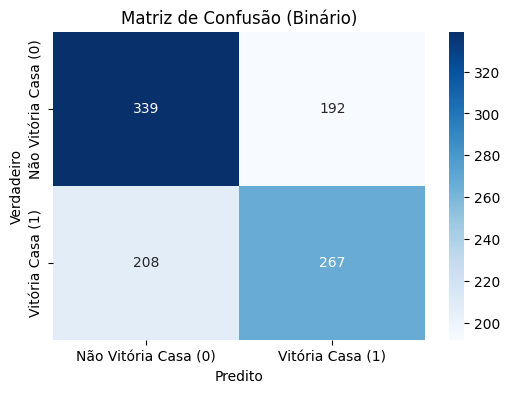

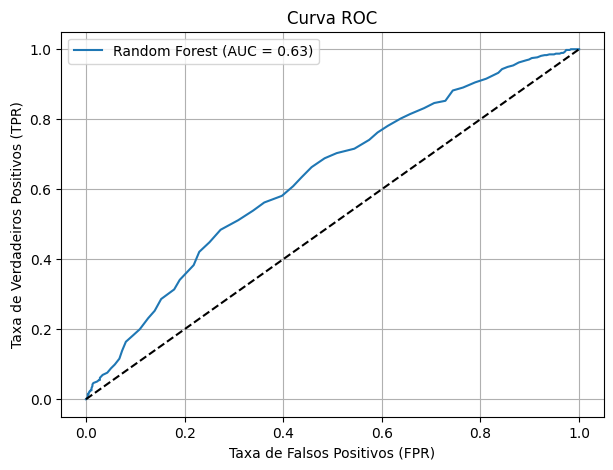


Importância das Features:
ProbA                 0.051192
TA_LgAvg_HG_Season    0.050033
MaxCA                 0.049519
TA_LgAvg_AG_Season    0.049155
ProbH                 0.049080
AvgCA                 0.049014
Poisson_ProbH         0.044767
ProbD                 0.042800
PSCA                  0.042608
Poisson_ProbD         0.042288
dtype: float64


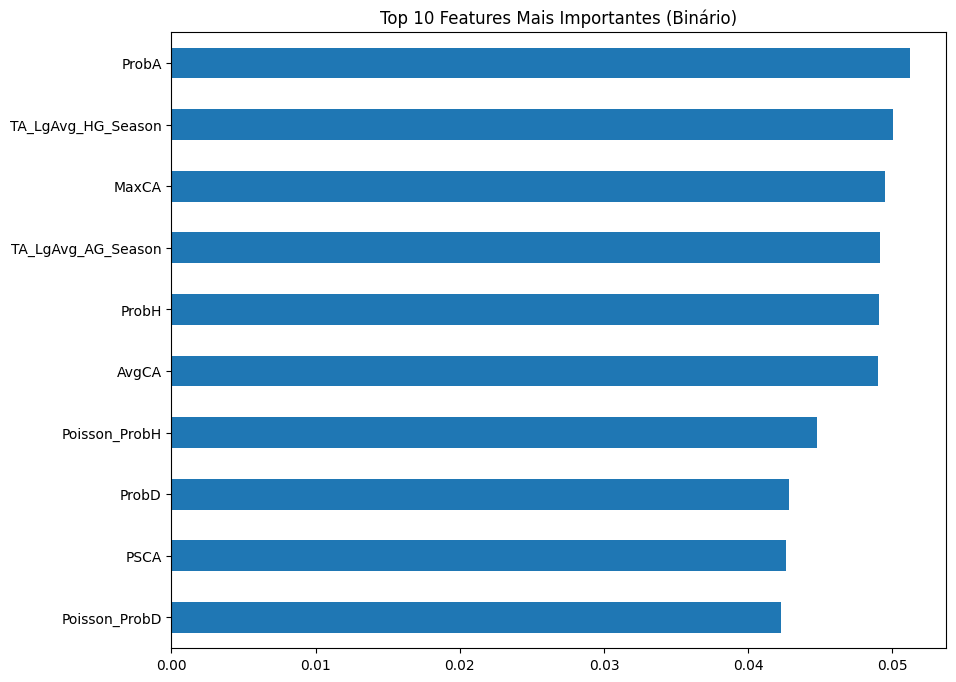

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --- PASSO 0: CARREGAR E PREPARAR O DATAFRAME 'df' ---
# Supondo que 'df' já existe e contém 'Res_Numeric' e todas as features.
# Se não, carregue ou crie seu df aqui.
# Exemplo:
# df = pd.read_csv('seu_dataframe_processado.csv')
# Certifique-se que 'Date' é datetime e 'Res_Numeric' existe.

df['sum_probs'] = df['ProbH'] + df['ProbD'] + df['ProbA'] # Simular sum_probs
df['Margin'] = df['sum_probs'] -1 # Simular Margin


# --- CRIAÇÃO DA VARIÁVEL ALVO BINÁRIA ---
df['Res_HomeWin_Binary'] = np.where(df['Res_Numeric'] == 1, 1, 0)

# Ordenar por data é importante para o split cronológico
df = df.sort_values(by='Date').reset_index(drop=True)


# --- PASSO 1: Seleção de Features e Target ---
y = df['Res_HomeWin_Binary']
feature_cols = [
    'AvgCH', 'AvgCD', 'AvgCA', 'MaxCH', 'MaxCD', 'MaxCA', 'PSCH', 'PSCD', 'PSCA',
    'ProbH', 'ProbD', 'ProbA', 'sum_probs', 'Margin',
    'TA_LgAvg_HG_Season', 'TA_LgAvg_AG_Season',
    'HomeTeam_MA_Scored_Home', 'HomeTeam_MA_Conceded_Home',
    'AwayTeam_MA_Scored_Away', 'AwayTeam_MA_Conceded_Away',
    'lambda_home', 'lambda_away',
    'Poisson_ProbH', 'Poisson_ProbD', 'Poisson_ProbA',
    'MA_AttackHome_vs_DefenseAway', 'MA_AttackAway_vs_DefenseHome'
]
X = df[feature_cols]

print(f"\nDistribuição da variável alvo binária (y):")
print(y.value_counts(normalize=True))

print(f"\nShape das features X: {X.shape}")
print(f"Shape do target y: {y.shape}")

# --- PASSO 2: Preparação dos Dados ---
if X.isnull().any().any():
    print("\nAVISO: Existem NaNs nas features selecionadas. Imputando com a média da coluna...")
    for col in X.columns:
        if X[col].isnull().any():
            X[col] = X[col].fillna(X[col].mean())
    print("NaNs imputados.")

split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"\nShape de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test.shape}, y_test: {y_test.shape}")

if len(X_train) == 0 or len(X_test) == 0:
    raise ValueError("Conjunto de treino ou teste está vazio...")

# --- PASSO 3: Treinamento do Modelo ---
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', oob_score=True)
print("\nTreinando o modelo RandomForestClassifier...")
model.fit(X_train, y_train)

if hasattr(model, 'oob_score_') and model.oob_score_:
    print(f"OOB Score (estimativa de acurácia no treino): {model.oob_score_:.4f}")

# --- PASSO 4: Predições e Avaliação ---
print("Fazendo predições no conjunto de teste...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para a classe positiva (Vitória Casa)

print("\n--- Avaliação do Modelo no Conjunto de Teste ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

# AUC Score (para classificação binária)
try:
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC Score: {auc:.4f}")
except ValueError as e:
    print(f"Não foi possível calcular AUC (pode ocorrer se y_test tiver apenas uma classe): {e}")


print("\nRelatório de Classificação:")
target_names_binary = ['Não Vitória Casa (0)', 'Vitória Casa (1)'] # Atualizado
print(classification_report(y_test, y_pred, labels=[0, 1], target_names=target_names_binary, zero_division=0))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1]) # Atualizado
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_binary, yticklabels=target_names_binary)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (Binário)')
plt.show()

# Curva ROC
if 'auc' in locals(): # Verifica se AUC foi calculado
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') # Linha de referência (aleatório)
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    plt.grid(True)
    plt.show()

if hasattr(model, 'feature_importances_'):
    print("\nImportância das Features:")
    importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(importances.head(10))
    plt.figure(figsize=(10, 8))
    importances.head(10).plot(kind='barh')
    plt.title('Top 10 Features Mais Importantes (Binário)')
    plt.gca().invert_yaxis()
    plt.show()